## Normal Distribution and Emprical Rule

Imagine a class of 1,000 students who took a Math exam. The exam scores follow a **normal distribution**:

* **Mean** (average score) = 70
* **Standard Deviation (SD)** = 10

We want to understand:

* How many students scored within ±1 SD (60 to 80)?
* How many scored between 50–90 (±2 SD)?
* How many scored below 40 or above 100 (±3 SD)?

### 🔢 Step 1: Simulate Normally Distributed Exam Scores

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Simulate exam scores
np.random.seed(42)
scores = np.random.normal(loc=70, scale=10, size=1000)  # Mean=70, SD=10

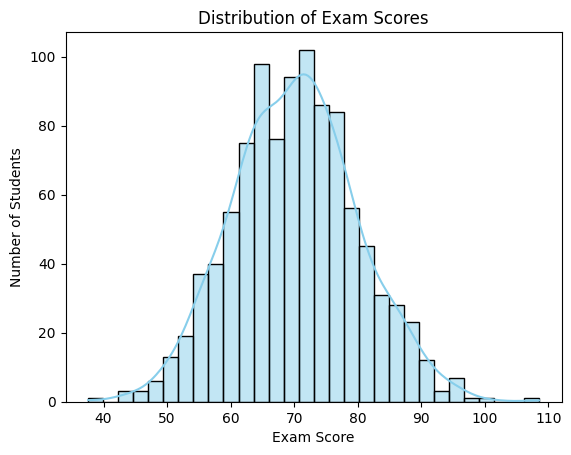

In [10]:
# Plot histogram with KDE
sns.histplot(scores, kde=True, bins=30, color='skyblue')
plt.title("Distribution of Exam Scores")
plt.xlabel("Exam Score")
plt.ylabel("Number of Students")
plt.show()

### 📘 Step 2: Understand the **Empirical Rule (68-95-99.7 Rule)**

| SD Range       | % of Data in Normal Distribution |
| -------------- | -------------------------------- |
| ±1 SD (60–80)  | \~68% of values                  |
| ±2 SD (50–90)  | \~95% of values                  |
| ±3 SD (40–100) | \~99.7% of values                |

📌 It helps to **predict data spread** without needing to count all values.



### 📏 Step 3: Calculate Ranges for Empirical Rule

In [11]:
mean = np.mean(scores)
std = np.std(scores)

In [12]:
range_1 = (mean - std, mean + std)   # 68%
range_2 = (mean - 2*std, mean + 2*std)  # 95%
range_3 = (mean - 3*std, mean + 3*std)  # 99.7%

In [13]:
print(f"Mean: {mean:.2f}, Standard Deviation: {std:.2f}")
print(f"68% Range: {range_1}")
print(f"95% Range: {range_2}")
print(f"99.7% Range: {range_3}")

Mean: 70.19, Standard Deviation: 9.79
68% Range: (np.float64(60.40605848074972), np.float64(79.9805826356968))
95% Range: (np.float64(50.61879640327618), np.float64(89.76784471317035))
99.7% Range: (np.float64(40.831534325802636), np.float64(99.55510679064389))


### ✅ Step 4: Count % of Students in Each Range

In [14]:
def percent_in_range(data, range_tuple):
    return np.mean((data >= range_tuple[0]) & (data <= range_tuple[1])) * 100

In [15]:
print(f"Within 1 SD (68%): {percent_in_range(scores, range_1):.2f}%")
print(f"Within 2 SD (95%): {percent_in_range(scores, range_2):.2f}%")
print(f"Within 3 SD (99.7%): {percent_in_range(scores, range_3):.2f}%")

Within 1 SD (68%): 68.60%
Within 2 SD (95%): 95.60%
Within 3 SD (99.7%): 99.70%


You’ll see results close to:

```
Within 1 SD (68%): ~68%
Within 2 SD (95%): ~95%
Within 3 SD (99.7%): ~99.7%
```

### 🎯 Step 5: Visualize Empirical Rule on the Bell Curve

In [16]:
x = np.linspace(40, 100, 500)
y = (1 / (std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std) ** 2)

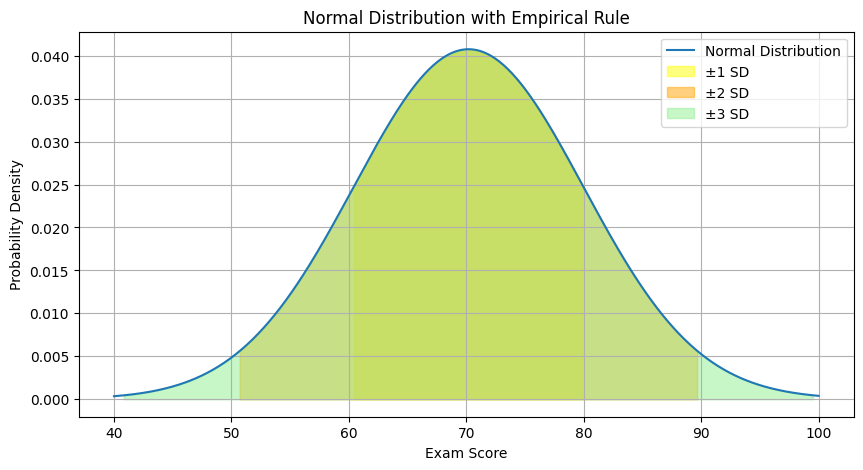

In [17]:
plt.figure(figsize=(10, 5))
plt.plot(x, y, label="Normal Distribution")

# Highlight 1, 2, 3 SDs
for i, color in zip([1, 2, 3], ['yellow', 'orange', 'lightgreen']):
    plt.fill_between(x, y, where=(x > mean - i*std) & (x < mean + i*std), alpha=0.5, color=color, label=f'±{i} SD')

plt.title("Normal Distribution with Empirical Rule")
plt.xlabel("Exam Score")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True)
plt.show()

### 🧠 Final Thoughts: Why is this Useful?

* Helps in **grading**: Identify top/bottom 5% students.
* Useful in **quality control**: Detect if a process is out of control.
* Used in **finance, psychology, and research** to make decisions based on "normal" data spread.